# Radiative Transfer Model
## Load Modules

In [1]:
%matplotlib inline
import RT
import numpy as np
import matplotlib.pyplot as plt

## Load Incident Spectrum

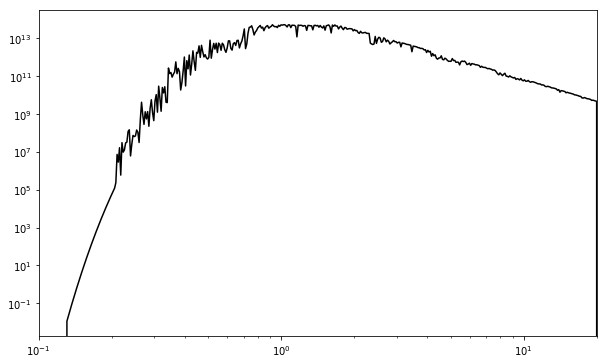

In [2]:
# Load Incident Spectrum
Teff = 3300 # 4500
logg = -0.5 # 0.00

lbda, F_nu_R = np.loadtxt( './Data/Teff_{}_logg_{}.dat'.format( str( '%04d' %Teff ), 
                                                                str( '%.2f' %logg ) ), skiprows = 2 ).T

# Plot
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.plot(lbda*1e4, F_nu_R, 'k-')
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlim(0.1, 20)
plt.show()

## Set up your first model

Now it's time to build up your first radiative transfer model. Currently, only shell models are supported.

In [8]:
from importlib import reload
reload(RT)
# Define a new shell model
RT_Model = RT.shell()

Changes are allowed to make to almost all the parameters shown above according to the real physical environment. The central star parameters are stored in a dictionary `stellar_params`, the parameters to make grids are listed in `grid_params`, and dust parameters can be accessed in `dust_params`. The corresponding keys are presented below:

#### Keys in  `stellar_params`:

```
|Key                    |          Annotation                     | dtype    |
|-----------------------|-----------------------------------------|----------|
|R                      |Radius of the central star (R_sun)       |scalar    |
|M                      |Mass of the central star (M_sun)         |scalar    |
|Teff                   |Effective Temperature (K)                |scalar    |
|logg                   |Surface gravity                          |scalar    |
```

#### Keys in `grid_params`:
```
|Key                    |Annotation                               |dtype     |
|-----------------------|-----------------------------------------|----------|
|lbda_min               |Minimum Wavelength (um)                  |scalar    |
|lbda_max               |Maximum Wavelength (um)                  |scalar    |
|nlbda                  |Number of wavelengths                    |scalar    |
|r_min                  |Inner edge (au)                          |scalar    |
|r_max                  |Outer edge (au)                          |scalar    |
|nr                     |Number of layers                         |scalar    |
|ntheta                 |Number of theta grid                     |scalar    |
|a_min                  |Minimum dust radius (um)                 |scalar    |
|a_max                  |Maximum dust radius (um)                 |scalar    |
|na                     |Number of radius                         |scalar    |
```
#### Keys in `dust_params`:
```
|Key                    |Annotation                               |dtype     |
|-----------------------|-----------------------------------------|----------|
|siltype                |a                                        |str       |
|cartype                |a                                        |str       |
|icetype                |a                                        |str       |
|f_sil                  |Volume fraction of silicate dust         |scalar    |
|f_car                  |Volume fraction of carbonaceous dust     |scalar    |
|f_ice                  |Volume fraction of ice                   |scalar    |
|rho_sil                |Mass density of silicate dust (g/cm3)    |scalar    |
|rho_car                |Mass density of carbonaceous dust (g/cm3)|scalar    |
|rho_ice                |Mass density of ice (g/cm3               |scalar    |
|radial_distribution    |Radial density distribution              |func      |
|distribution_parameters|Distribution parameters                  |array like|
```
Let's try to make some changes over the default parameters.
## Adjust parameters

In [9]:
# Adjust parameters
RT_Model.stellar_params['M'] = 15.0
RT_Model.stellar_params['Teff'] = Teff
RT_Model.stellar_params['logg'] = logg
RT_Model.dust_params['f_sil'] = 0.5
RT_Model.dust_params['f_car'] = 0.5
RT_Model.dust_params['distribution_parameters'] = [2.0, 4.0]

# Use setup() method to set up the model with new dictionaries and
# print out updated parameters by setting show = 1.
RT_Model.setup( stellar_params = RT_Model.stellar_params, 
                grid_params    = RT_Model.grid_params, 
                dust_params    = RT_Model.dust_params, 
                show           = 1 )

Stellar parameters:
    R    =   900.0 R_sun
    M    =    15.0 M_sun
    Teff =  3300.0 K
    logg =    -0.5

Grids:
    Wavelength   (#1000):     0.0912 - 10000.0000 micron
    Shell Radius (#  52):       18.0 -     1000.0 au
    Dust Size    (# 102):       0.01 -    1000.00 micron
    Theta        (#  25):          0 -         pi

Dust properties:
    -----------------------------------------------------------
    Dust Component  Volume Fraction  Mass Density (g/cm3)  Type
    -----------------------------------------------------------
      Silicate            50%              3.50            DL84
      Carbon              50%              3.30            amca
    -----------------------------------------------------------
    Radial Density Distribution: modified_power_law
        Distribution Parameters: [2.0, 4.0]


## Initialization

In [10]:
# Initialize
RT_Model.initialize( F_nu_R, show = 1 )

Radius  (au)       18.0    39.57    86.99    191.24    420.42    924.25
--------------  -------  -------  -------  --------  --------  --------
silicate (K)     793.48   477.64   311.09    219.21    160.82    120.05
carbon   (K)    1045.32   768.1    564.73    415.1     305.6     225.72


## Run

In [11]:
# Define free parameters:
# 1. Power law index for size distribution ( MRN: dn/da ~ a^(-alpha) )
alpha = 4.0
# 2. Optical depth
tau = np.logspace(np.log10(1.0), np.log10(2.5), 3)

# Run
RT_Model.run( alphas = alpha, optical_depths = tau )

0.11645951701387389
